In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-challenge/sample_submission.csv
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv


In [51]:
train =pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [52]:
train.shape

(29451, 12)

No missing values

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


most of houses not under construction

In [54]:
train['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [55]:
train['READY_TO_MOVE'].value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

In [56]:
train['RESALE'].value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

In [57]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

handling categorical values , there is many ways like this two ways or OHE or LE or dummies

In [58]:
#train['POSTED']=train['POSTED_BY'].apply(lambda x :0 if x=='Dealer' else 1 if x=='Owner' else 2)

In [59]:
#train.drop("POSTED_BY",axis=1,inplace=True)

In [60]:
mappp={'Dealer':0,"Owner":1,'Builder':2}

train['POSTED_BY']=train['POSTED_BY'].map(mappp)

In [61]:
train['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [62]:
mapp={'BHK':0,"RK":1}
train['BHK_OR_RK']=train['BHK_OR_RK'].map(mapp)

In [63]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,0,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,1,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,1,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,0,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


number of rooms between 1 and 20 






<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='BHK_NO.'>

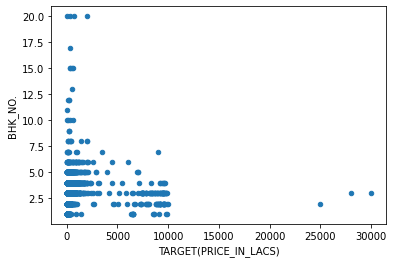

In [64]:
train.plot(kind='scatter',x='TARGET(PRICE_IN_LACS)',y='BHK_NO.')

latitude between 60 and 150, doesn't highly effect

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='LATITUDE'>

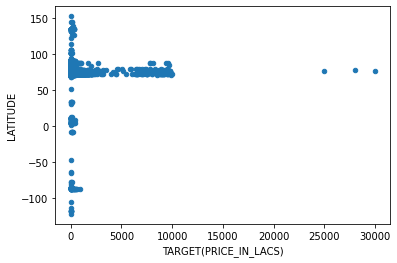

In [65]:
train.plot(kind='scatter',x='TARGET(PRICE_IN_LACS)',y='LATITUDE')

longitude between 0 and 40 ,  doesn't highly effect but near to 40 less cost

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='LONGITUDE'>

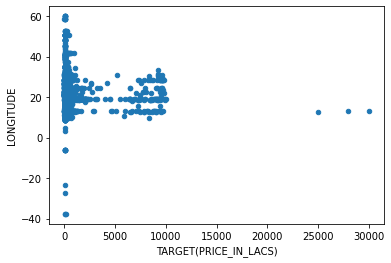

In [66]:
train.plot(kind='scatter',x='TARGET(PRICE_IN_LACS)',y='LONGITUDE')

log for area

In [67]:
train['AREA']=np.log(train['SQUARE_FT'])


price direct proportional with area

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='AREA'>

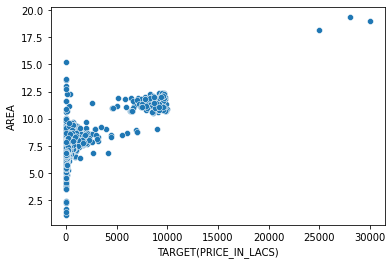

In [68]:
sns.scatterplot(data=train,x='TARGET(PRICE_IN_LACS)',y='AREA')

drop column before log

In [69]:
train.drop('SQUARE_FT',axis=1,inplace=True)

In [70]:
train.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),AREA
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.400054,0.179756,0.317918,2.392279,0.000815,0.820244,0.929578,21.300255,76.837695,142.898746,7.086932
std,0.531282,0.383991,0.465675,0.879091,0.028536,0.383991,0.255861,6.205306,10.557747,656.880713,0.593580
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,1.098612
25%,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,18.452663,73.798100,38.000000,6.802418
50%,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,20.750000,77.324137,62.000000,7.069072
75%,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,26.900926,77.828740,100.000000,7.346454
max,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,59.912884,152.962676,30000.000000,19.354990


location doesn't highly effect to price

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

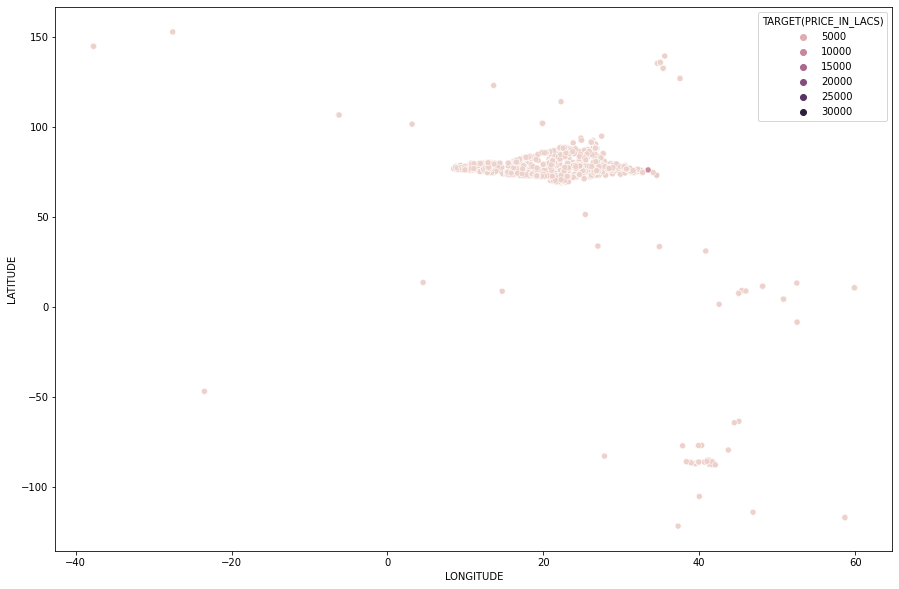

In [71]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train,x='LONGITUDE',y='LATITUDE',hue='TARGET(PRICE_IN_LACS)')

divide features to categorical and numerical

In [72]:
cat_features = ['POSTED_BY', 'BHK_OR_RK']
num_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'AREA']

area, number of rooms, price highly correlated with each other

<AxesSubplot:>

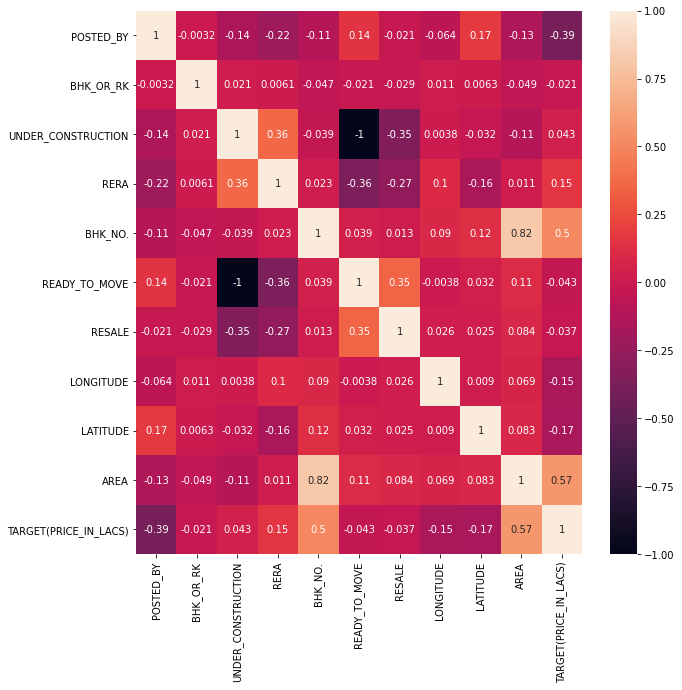

In [73]:
plt.figure(figsize=(10, 10))
corr=train[cat_features+num_features+['TARGET(PRICE_IN_LACS)']].corr(method='spearman')
sns.heatmap(corr, annot=True)


handling outliers

In [74]:
outlier_percentage = {}
for feature in ['AREA', 'BHK_NO.', 'TARGET(PRICE_IN_LACS)']:
    tempData = train.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'AREA': 3.55, 'BHK_NO.': 0.96, 'TARGET(PRICE_IN_LACS)': 10.47}

In [75]:
outlier = train[(train[feature]>Lower_range) & (train[feature]<Upper_range)].reset_index(drop=True)


In [76]:
train.drop(['ADDRESS'],axis=1,inplace=True)

In [77]:
X=train.drop(['TARGET(PRICE_IN_LACS)'],axis=1)

y=train['TARGET(PRICE_IN_LACS)']

feature selection


under constrauction and ready to move exactly the same , location has small effect

In [78]:
from sklearn.feature_selection import SelectKBest,f_regression
best=SelectKBest(score_func=f_regression,k='all')
fit=best.fit(X,y)
dfScores=pd.DataFrame(fit.scores_)
dfCol=pd.DataFrame(X.columns)
featScore=pd.concat([dfCol,dfScores],axis=1)
featScore.columns=['Feature','Score']
featScore=featScore.sort_values(by='Score',ascending=False).reset_index(drop=True)
print(featScore.nlargest(10,'Score'))

              Feature         Score
0                AREA  16247.911023
1              RESALE   1323.389372
2             BHK_NO.    376.015844
3           POSTED_BY    152.873688
4                RERA    135.338539
5       READY_TO_MOVE     90.659720
6  UNDER_CONSTRUCTION     90.659720
7           LONGITUDE     28.533212
8            LATITUDE      8.769293
9           BHK_OR_RK      0.577569


another way for feature selection

In [79]:
#from sklearn.ensemble import ExtraTreesRegressor
#ex=ExtraTreesRegressor()
#ex.fit(X,y)

In [80]:
#ex.feature_importances_


In [81]:
#plt.figure(figsize=(10,10))
#plt.title('Feature importances')
#feat=pd.Series(ex.feature_importances_,index=X.columns)
#feat.nlargest(10).plot(kind='barh', color="r", align="center")
#plt.tight_layout()
#plt.show()

removing features with vif , there is another way called RFE "Recursive Feature Elimination"

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v = pd.DataFrame()
v["variables"] = [feature for feature in cat_features+num_features if feature not in ['READY_TO_MOVE', 
                                                                    'RESALE', 'LATITUDE', 'LONGITUDE']]
v["VIF"] = [variance_inflation_factor(train[v['variables']].values, i) for i in range(len(v["variables"]))]
print(v)

            variables        VIF
0           POSTED_BY   1.608070
1           BHK_OR_RK   1.002365
2  UNDER_CONSTRUCTION   1.405334
3                RERA   1.735676
4             BHK_NO.  11.212789
5                AREA  13.261412


splitting the data

In [83]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42)

feature scaling

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [85]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression ,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from xgboost.sklearn import XGBRegressor

train models

In [86]:
models = {'Linear Regression': LinearRegression(),
         'Lasso': Lasso(),
         'Decision Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(),
         'Gradient Boosting =':GradientBoostingRegressor(),
         'Ridge': Ridge(),
         'Stochastic Gradien Descent': SGDRegressor(),
         'Elastic': ElasticNet(),
         'xgb Regressor': XGBRegressor()}

fit and score

In [87]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='neg_mean_squared_error',
                                            cv=3
                                            ).mean()

    return model_scores

Decision tree has lowest mse

In [88]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Linear Regression': -358297.7353676564,
 'Lasso': -359022.28920652246,
 'Decision Tree': -187123.1833882388,
 'Random Forest': -237509.06245919177,
 'Gradient Boosting =': -228790.07101336643,
 'Ridge': -358307.865396715,
 'Stochastic Gradien Descent': -343300.6643165237,
 'Elastic': -403410.95602747257,
 'xgb Regressor': -302810.4619901233}

voting

In [89]:
vot=VotingRegressor([('LinearRegression',LinearRegression()),('DecisionTrees',DecisionTreeRegressor()),('LassoRegression',Lasso()),
                     ('RandomForest',RandomForestRegressor()),('ElasticNet',ElasticNet()),
                     ('StochasticGradientDescent',SGDRegressor()),
                    ('GrafientBoosting',GradientBoostingRegressor()),('Ridge',Ridge()),('xgb',XGBRegressor())])
vot.fit(X_train,y_train)
y_pred=vot.predict(X_test)

as expected , voting has smallest mse

In [90]:
mean_squared_error(y_test,y_pred)


105851.08911783442

In [91]:
np.random.seed(42)
params={
        'criterion':['mse', 'mae'],
         'max_features':['auto','sqrt','log2'],
        'max_depth':[2,3,10]
       }
rs = RandomizedSearchCV(DecisionTreeRegressor(),
                                param_distributions=params,
                                cv=3,
                                n_iter=30,
                                verbose=0,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=30. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'mae'}

In [92]:
rs.best_estimator_



DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='sqrt')

In [93]:
rs.best_score_


0.8924137584432602

In [94]:
rs.score(X_test, y_test)


0.7732053435569228

In [95]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
r2_score(y_pred,y_test)

0.9551404496014154

In [97]:
test =pd.read_csv('/kaggle/input/house-price-prediction-challenge/test.csv')


In [98]:
test.shape

(68720, 11)

In [99]:
final=test.drop('ADDRESS',axis=1,inplace=True)

In [105]:

mappp={'Dealer':0,"Owner":1,'Builder':2}

test['POSTED_BY']=test['POSTED_BY'].map(mappp)

In [106]:
mapp={'BHK':0,"RK":1}
test['BHK_OR_RK']=test['BHK_OR_RK'].map(mapp)

In [107]:
test['AREA']=np.log(test['SQUARE_FT'])


In [108]:
test.drop('SQUARE_FT',axis=1,inplace=True)

In [111]:
scaler=StandardScaler()
test=scaler.fit_transform(test)

In [112]:
price=model.predict(test)

In [115]:
result=pd.DataFrame(price,columns=["TARGET(PRICE_IN_LACS"])

result.to_csv("ResultHousePrices.csv",index=None)